# Grain dataset

In [1]:
import numpy as np
import pandas as pd
grains = pd.read_csv('Grains/seeds.zip', header=None)\
    .set_axis(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
               'asymmetry_coefficient', 'kernel_groove_length', 'variety'], axis=1)
grains

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [2]:
samples = grains.iloc[:, :-1]
samples.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


## Hierachical clustering

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from scipy.cluster.hierarchy import linkage, dendrogram

Compute the distance matrix

In [4]:
mergings = linkage(samples, method='complete')

Plot dendrogram

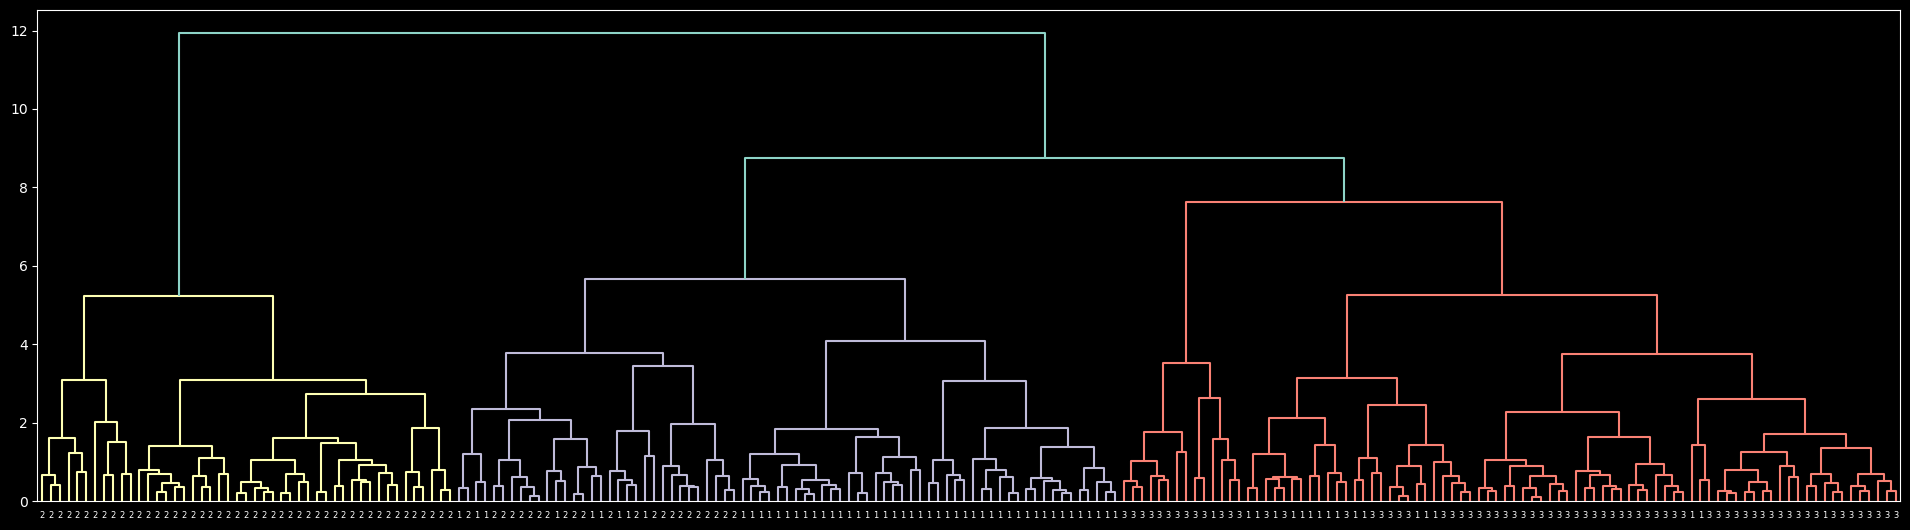

In [5]:
plt.figure(figsize=(19.2, 10.8/2))
dendrogram(mergings, labels=grains['variety'].values, leaf_rotation=0, leaf_font_size=6)
plt.tight_layout()
plt.show()

## Extracting flat cluster labels at specified distance

In [6]:
from scipy.cluster.hierarchy import fcluster
# Form flat clusters from the hierarchical clustering defined by the given linkage matrix.
labels = fcluster(mergings, 8, criterion='distance')
df = pd.DataFrame({'labels': labels, 'varieties': grains['variety'].values}).sort_values('labels')
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,1,2,3
labels,,,
1,0,47,0
2,52,23,0
3,18,0,70


## t-SNE visualization

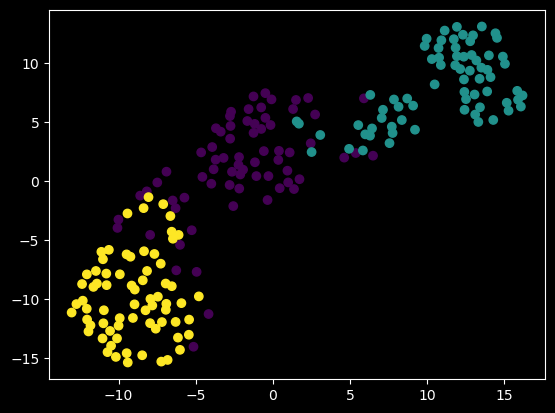

In [7]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(samples)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=grains['variety'])
plt.show()

# Stocks dataset

In [8]:
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.zip').rename(columns={'Unnamed: 0': 'id'}).set_index('id')
stocks

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
id,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996


## Hierachical clustering of unnormalized stock movements

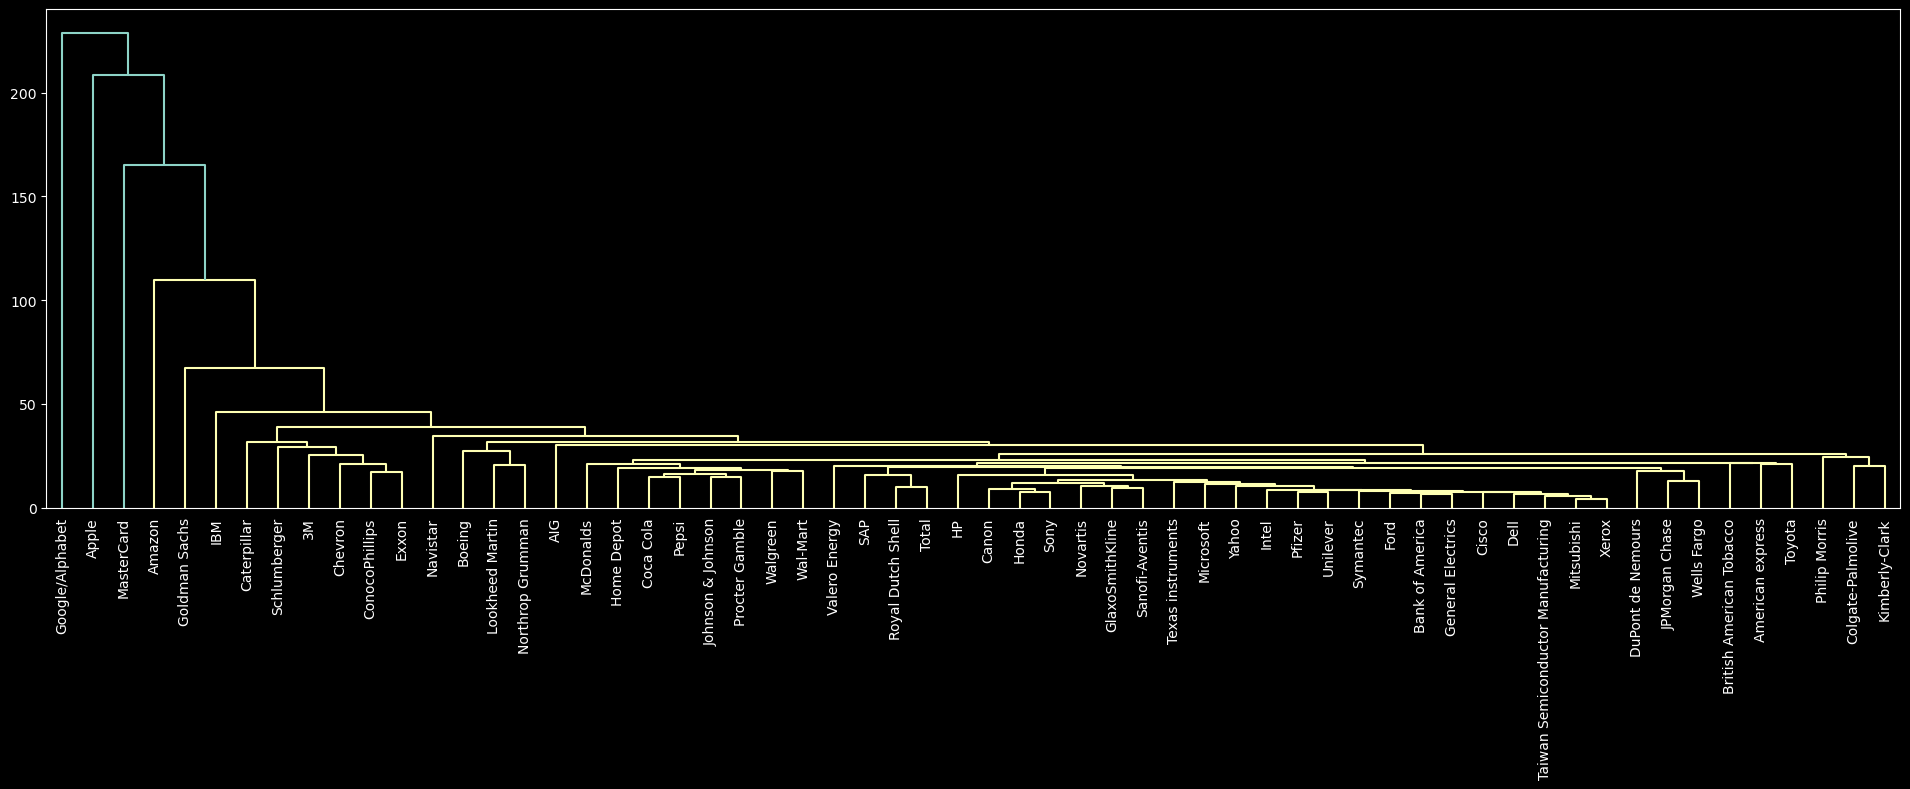

In [9]:
from sklearn.preprocessing import normalize
mergings = linkage(stocks.values, method='complete')
plt.figure(figsize=(19.2, 8))
dendrogram(mergings, labels=stocks.index, leaf_rotation=90, leaf_font_size=10)
plt.tight_layout()
plt.show()

## Hierachical clustering of normalized stock movements

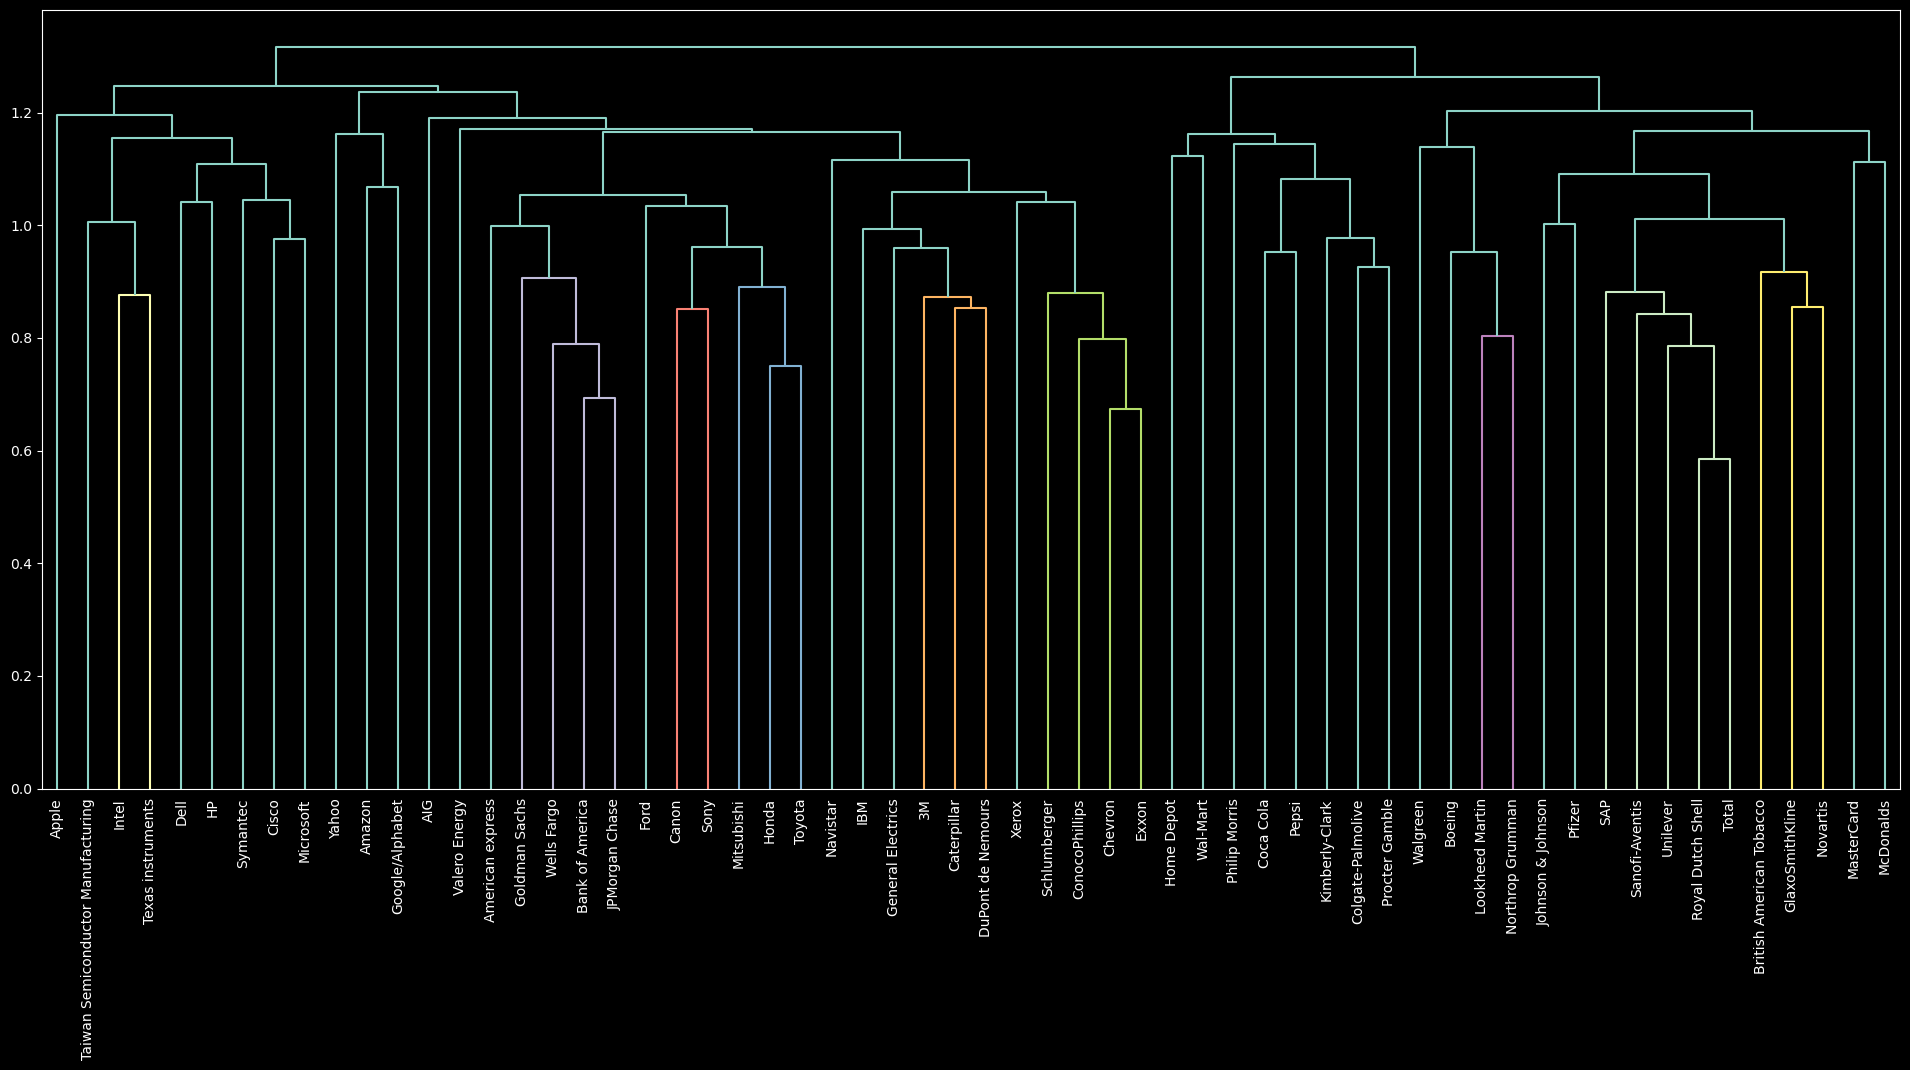

In [10]:
from sklearn.preprocessing import normalize
normalized_movements = normalize(stocks.values)
mergings = linkage(normalized_movements, method='complete')
plt.figure(figsize=(19.2, 10.8))
dendrogram(mergings, labels=stocks.index, leaf_rotation=90, leaf_font_size=10)
plt.tight_layout()
plt.show()

## Extracting flat cluster labels at a specified distance

In [11]:
from scipy.cluster.hierarchy import fcluster
# Form flat clusters from the hierarchical clustering defined by the given linkage matrix.
labels = fcluster(mergings,
                  1.2, #1
                  criterion='distance')
print(labels)
pd.DataFrame({'labels': labels, 'countries': stocks.index}).sort_values('labels')

[1 3 2 3 5 3 6 3 3 4 3 1 3 3 1 3 3 2 3 6 4 3 1 3 1 6 3 4 4 5 6 6 3 1 3 3 5
 6 4 6 4 4 6 6 3 3 6 1 3 6 1 1 6 3 5 3 4 3 3 2]


,labels,countries
0,1,Apple
11,1,Cisco
14,1,Dell
22,1,HP
24,1,Intel
50,1,Taiwan Semiconductor Manufacturing
47,1,Symantec
33,1,Microsoft
51,1,Texas instruments
17,2,Google/Alphabet


## t-SNE "map" of stock market time series data

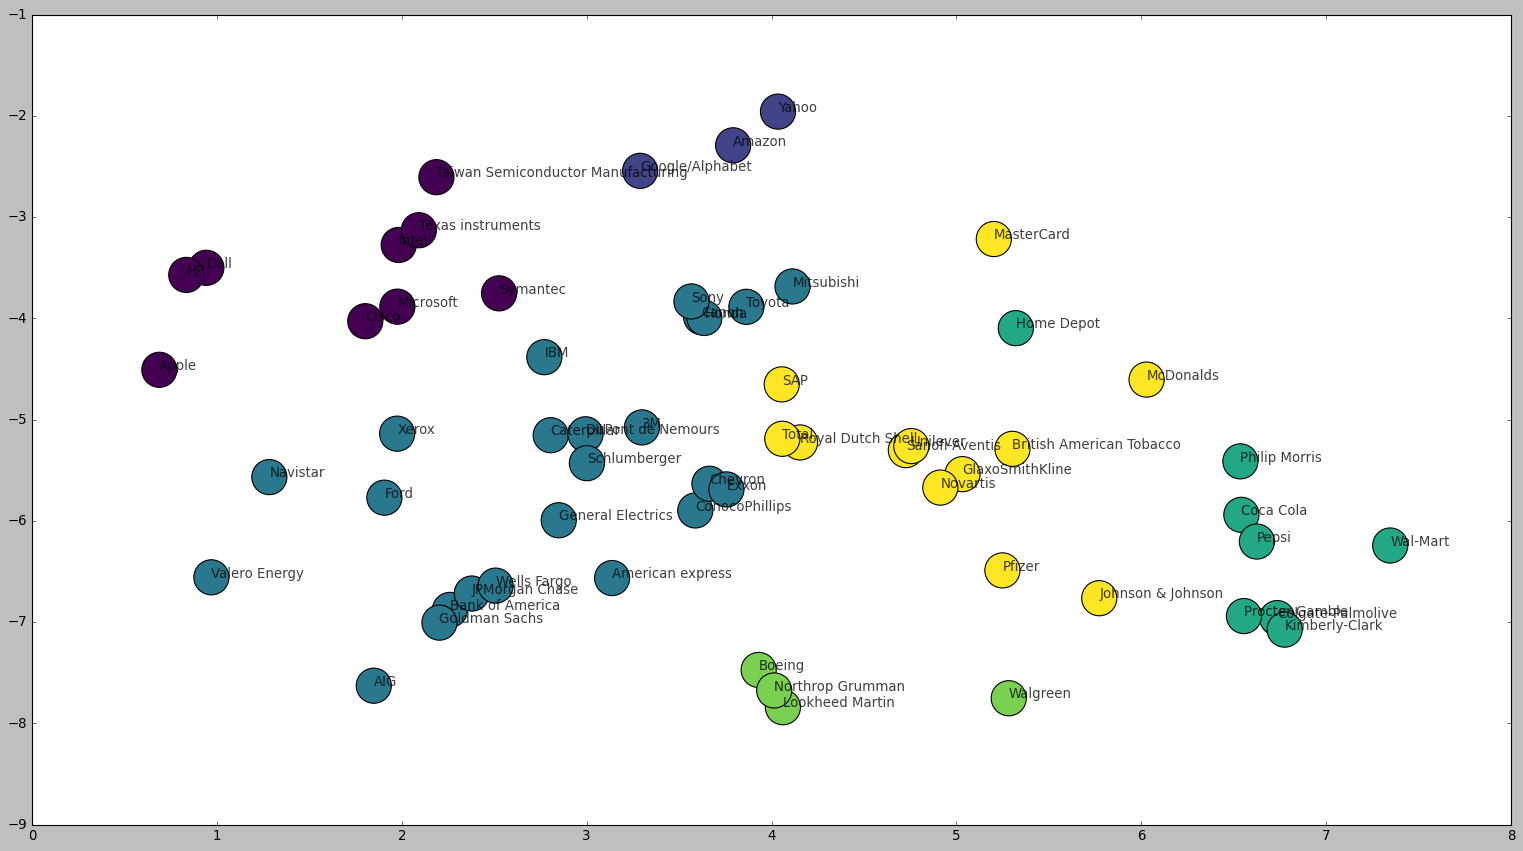

In [12]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)
xs = tsne_features[:, 0]
ys = tsne_features[:,1]

plt.style.use('classic')
plt.figure(figsize=(19.2, 10.8))

spectral = plt.colormaps['viridis'].resampled(len(np.unique(labels)))
plt.scatter(xs, ys, s=1000, c=labels, cmap=spectral)#, alpha=0.5)
# Annotate the points
for x, y, company, label in zip(xs, ys, stocks.index, labels):
    plt.annotate(company, (x, y), fontsize=12, alpha=0.75)
plt.tight_layout()
plt.show()

# Iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
samples = iris.data
species = iris.target

## t-SNE visualization for 2 dimensional maps

T-distributed Stochastic Neighbor Embedding

> t-SNE does not have separate fit and transform methods. This means that you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.

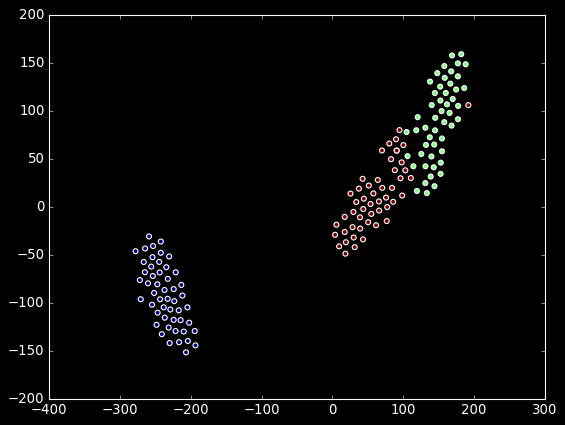

In [35]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=1000)
transformed = model.fit_transform(samples)
plt.style.use('dark_background')
plt.scatter(transformed[:,0], transformed[:,1], c=species)
plt.show()

> The learning rate makes the use of t-SNE more complicated than some other techniques. You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200 (10 to 1000 according to documentation). 

> the axes of a t-SNE plot do not have any interpretable meaning. In fact, they are different every time t-SNE is applied, even on the same data.